In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets

In [17]:
iris = datasets.load_iris()

In [19]:
X = pd.DataFrame(iris.data)

In [20]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
Y = pd.DataFrame(iris.target)

In [32]:
Y.shape,X.shape

((150, 1), (150, 4))

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [35]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
0    150 non-null int32
dtypes: int32(1)
memory usage: 680.0 bytes


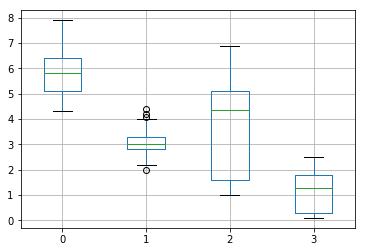

In [37]:
X.boxplot()


In [38]:
from sklearn.preprocessing import MinMaxScaler
X_s = MinMaxScaler()
X = X_s.fit_transform(X)

In [40]:
X = pd.DataFrame(X)

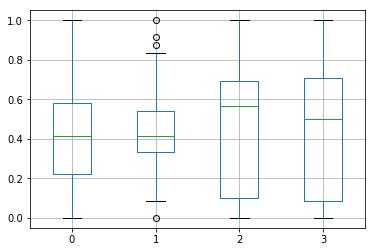

In [41]:
X.boxplot()

In [43]:
Y = Y.values.reshape(150,)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
log = LogisticRegression()
log.fit(X,Y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
from sklearn.model_selection import validation_curve
param_name = 'random_state'
param_range = [0]
train_scores, valid_scores = validation_curve(log, X, Y,
                                              param_name,param_range,cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

In [54]:
np.mean(valid_scores,axis=1)

array([0.84])

In [55]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
from sklearn.model_selection import validation_curve
param_name_k = 'n_neighbors'
param_range_k = list(range(1, 31))
train_scores_k, valid_scores_k = validation_curve(Knn, X, Y,param_name_k,param_range_k,cv=10)

In [80]:
train_scores_k_means = np.mean(train_scores_k,axis=1)
valid_scores_k_means = np.mean(valid_scores_k,axis=1)

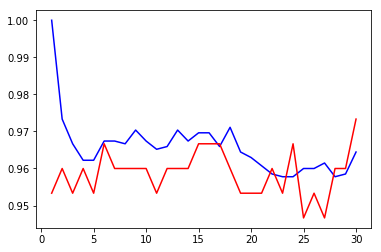

In [103]:
plt.plot(param_range_k,train_scores_k_means,color="b")
plt.plot(param_range_k,valid_scores_k_means,color="r")

In [104]:
valid_scores_k_means.argmax(),valid_scores_k_means[29]

(29, 0.9733333333333334)

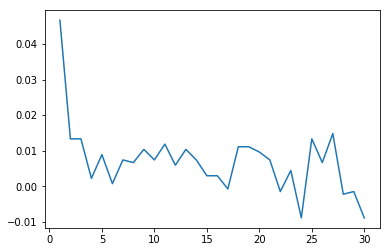

In [106]:
plt.plot(param_range_k,np.subtract(train_scores_k_means,valid_scores_k_means))

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
K_range = list(range(1,31))
weight_options = ["uniform","distance"]
p = list(range(1,3))

In [64]:
param_grid = dict(n_neighbors=K_range,weights=weight_options,p=p)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'p': [1, 2]}


In [65]:
grid = GridSearchCV(Knn,param_grid,cv=10,scoring='accuracy',return_train_score=True)
grid.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [66]:
results = pd.DataFrame(grid.cv_results_)[['mean_test_score','mean_train_score','std_test_score','params']]

In [67]:
results.head()

,mean_test_score,mean_train_score,std_test_score,params
0,0.946667,1.000000,0.065320,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}"
1,0.946667,1.000000,0.065320,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}"
2,0.953333,1.000000,0.066999,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}"
3,0.953333,1.000000,0.066999,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}"
4,0.953333,0.973333,0.066999,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}"


In [68]:
print(grid.best_score_)
print(grid.best_params_)
print(results['mean_test_score'].argmax())

0.9733333333333334
{'n_neighbors': 30, 'p': 2, 'weights': 'uniform'}
118


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


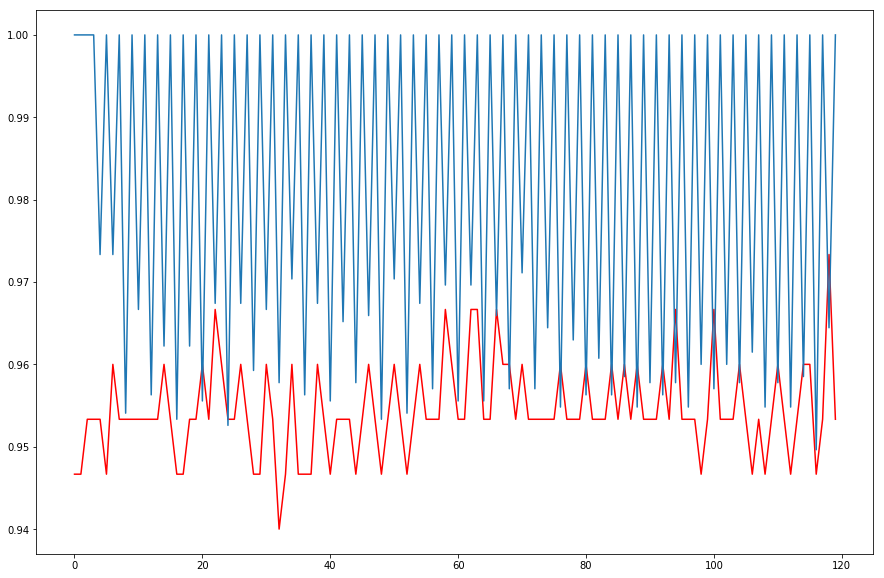

In [73]:
plt.figure(figsize=(15,10))
plt.plot(grid_test_scores,color="r")
plt.plot(grid_train_scores)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
DT = DecisionTreeClassifier()
DT.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
min_samples_split = list(range(2,6))
criterion = ["gini","entropy"]
max_depth = list(range(1,11))

In [89]:
param_grid_DT = dict(min_samples_split=min_samples_split,criterion=criterion,max_depth=max_depth)
print(param_grid_DT)

{'min_samples_split': [2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [90]:
grid_DT = GridSearchCV(DT,param_grid_DT,cv=10,scoring='accuracy',return_train_score=True)
grid_DT.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [91]:
results = pd.DataFrame(grid_DT.cv_results_)[['mean_test_score','mean_train_score','std_test_score','params']]

In [92]:
results.head()

,mean_test_score,mean_train_score,std_test_score,params
0,0.666667,0.666667,0.000000,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
1,0.666667,0.666667,0.000000,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
2,0.666667,0.666667,0.000000,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
3,0.666667,0.666667,0.000000,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
4,0.946667,0.960741,0.049889,"{'criterion': 'gini', 'max_depth': 2, 'min_sam..."


In [93]:
print(grid_DT.best_score_)
print(grid_DT.best_params_)
print(results['mean_test_score'].argmax())

0.96
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
from sklearn import metrics as val

In [95]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 0)

In [100]:
print(val.classification_report(Y_test,grid.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [101]:
print(val.classification_report(Y_test,grid_DT.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.96        13

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [108]:
accuracy_score(Y_test,grid_DT.predict(X_test))

0.98

In [110]:
import graphviz
dot_data = tree.export_graphviz(DT,out_file)
graph = graphviz.source(dot_data)

ModuleNotFoundError: No module named 'graphviz'